In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
train_dir = 'C:\\Users\\prajw\\Kidney-Try2\\Kidney_stone_detection\\Dataset\\Train'
test_dir = 'C:\\Users\\prajw\\Kidney-Try2\\Kidney_stone_detection\\Dataset\\Test'

In [3]:
# Define image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32


In [4]:
# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [5]:
# Only rescaling for validation/test
test_datagen = ImageDataGenerator(rescale=1.0/255.0)


In [6]:
# Generate batches of augmented data for training and validation sets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1453 images belonging to 2 classes.


In [7]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # No need to shuffle for test set evaluation
)


Found 346 images belonging to 2 classes.


In [8]:
# Define the CNN model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Assuming 2 classes for binary classification
])

In [9]:
    # Compile the model
    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


In [10]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=40,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

Epoch 1/40


45/45 [==============================] - 56s 1s/step - loss: 0.7271 - accuracy: 0.5496 - val_loss: 0.6994 - val_accuracy: 0.4844
Epoch 2/40
45/45 [==============================] - 55s 1s/step - loss: 0.6845 - accuracy: 0.5616 - val_loss: 0.7103 - val_accuracy: 0.4844
Epoch 3/40
45/45 [==============================] - 52s 1s/step - loss: 0.6848 - accuracy: 0.5658 - val_loss: 0.6919 - val_accuracy: 0.4969
Epoch 4/40
45/45 [==============================] - 49s 1s/step - loss: 0.6813 - accuracy: 0.5742 - val_loss: 0.7554 - val_accuracy: 0.4844
Epoch 5/40
45/45 [==============================] - 49s 1s/step - loss: 0.6755 - accuracy: 0.5834 - val_loss: 0.6902 - val_accuracy: 0.5906
Epoch 6/40
45/45 [==============================] - 51s 1s/step - loss: 0.6725 - accuracy: 0.5869 - val_loss: 0.7125 - val_accuracy: 0.5594
Epoch 7/40
45/45 [==============================] - 52s 1s/step - loss: 0.6751 - accuracy: 0.6003 - val_loss: 0.6775 - val_accuracy: 0.6156
Epoch 8/40
45/45 [

In [11]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)


11/11 [==============================] - 5s 451ms/step - loss: 0.1385 - accuracy: 0.9538
Test accuracy: 0.9537572264671326


In [12]:
# Access training accuracy history
training_accuracy = history.history['accuracy']
print("Training accuracy:", training_accuracy)

Training accuracy: [0.5496129393577576, 0.5615763664245605, 0.5657987594604492, 0.5742434859275818, 0.5833919644355774, 0.586910605430603, 0.6002814769744873, 0.6122449040412903, 0.6143561005592346, 0.6192821860313416, 0.6242083311080933, 0.6347642540931702, 0.6389866471290588, 0.6657283306121826, 0.7142857313156128, 0.7726953029632568, 0.8275862336158752, 0.8402533531188965, 0.883884608745575, 0.8916256427764893, 0.9007741212844849, 0.9064039587974548, 0.9148486852645874, 0.9162561297416687, 0.9338493943214417, 0.9408866763114929, 0.9429978728294373, 0.941590428352356, 0.9451090693473816, 0.9500352144241333, 0.9437016248703003, 0.9563687443733215, 0.9641097784042358, 0.9605911374092102, 0.9627023339271545, 0.9627023339271545, 0.9619985818862915, 0.9605911374092102, 0.9641097784042358, 0.9662209749221802]


In [13]:
# Save the entire model to a file
model.save('/path/to/save/model.h5')


C:\Users\prajw\anaconda3\envs\Kidney\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
# Save the entire model to a file
model.save('C:\\Users\\prajw\\Kidney-Try2\\Kidney_stone_detection\\model.h5')

In [15]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the saved model
saved_model = load_model('C:\\Users\\prajw\\Kidney-Try2\\Kidney_stone_detection\\model.h5')

# Path to the image you want to test
image_path = r"C:\\Users\\prajw\\OneDrive\\Desktop\\1.3.46.670589.33.1.63713381202000040800001.4767376869074405978.png"
# Replace with the path to your test image

# Load and preprocess the image
img = image.load_img(image_path, target_size=(224, 224))  # Adjust target_size as per your model input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize the image

# Perform prediction
prediction = saved_model.predict(img_array)
predicted_class = np.argmax(prediction)

# Define your class labels
class_labels = {0: 'Class_1', 1: 'Class_2'}  # Define your class labels based on your model

# Decode the predicted class
predicted_label = class_labels[predicted_class]

print(f'The predicted class is: {predicted_label}')


1/1 [==============================] - 0s 225ms/step
The predicted class is: Class_1


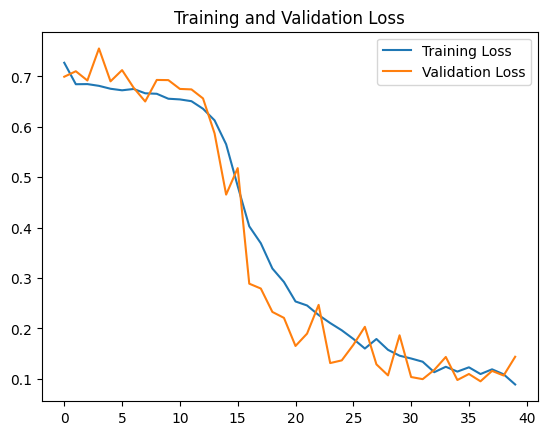

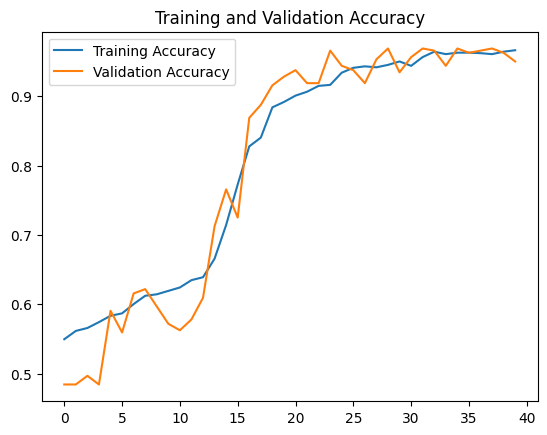

In [16]:
    import matplotlib.pyplot as plt

# Assuming you have `history` object from model training
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


In [17]:
# Assuming you have `test_generator` and a trained model `loaded_model`
test_loss, test_accuracy = saved_model.evaluate(test_generator)
print('Test accuracy:', test_accuracy)


11/11 [==============================] - 6s 485ms/step - loss: 0.1385 - accuracy: 0.9538
Test accuracy: 0.9537572264671326


11/11 [==============================] - 5s 472ms/step


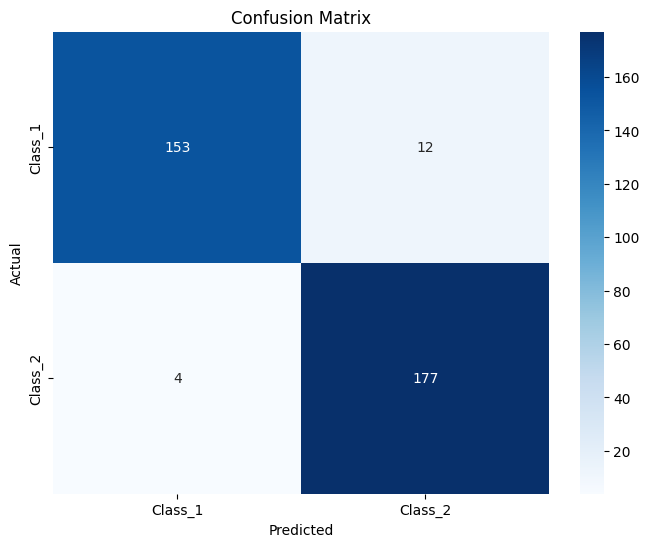

In [20]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generate predictions for the test set
predictions = saved_model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes

# Create the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels.values(), 
            yticklabels=class_labels.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
pip install seaborn
